In [1]:
import os
from utils.auxiliary_func import *
from utils.plots_func import *
from flim_analysis.spatial_analysis.spatial_func import *
import config.const as const
import config.params as params

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import tifffile
from tqdm import tqdm
import ast


## Define Parameters

In [2]:
patch_size = 1500
overlap = 0.75
fold_method='stratified_kfold'

In [3]:
figure_2_dir = os.path.join(const.base_dir, 'figure_results', 'Figure 2')
os.makedirs(figure_2_dir, exist_ok=True)

data_preparation_dir = os.path.join(const.base_dir, 'figure_results', 'data_preparation')
os.makedirs(data_preparation_dir, exist_ok=True)

## Plot nucleus single lifetime value image

#### Note on Data Preparation

The core_single_nuclei_lifetime image used in this code was generated in the following notebook:

**`TNBC_FLIM/notebooks/analysis_paper_result_reproduce/Figure_1_preparation.ipynb`**

Please make sure to run that notebook first to prepare the necessary image before executing this one.

In [4]:
leap_num = '043'
figure_1_dir = os.path.join(const.base_dir, 'figure_results', 'Figure 1')
core_single_nuclei_lifetime_path = os.path.join(figure_1_dir, f'Leap{leap_num}_single_lifetime.tif')

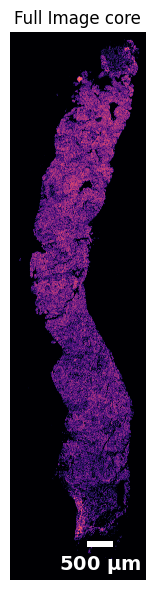

In [5]:
save_img_path = os.path.join(figure_2_dir, "full_image_single_nuclei_lifetime.png")
plt_fig = plot_full_image_from_path(core_single_nuclei_lifetime_path, 'core', figure_size=(6,6), save_path=save_img_path)


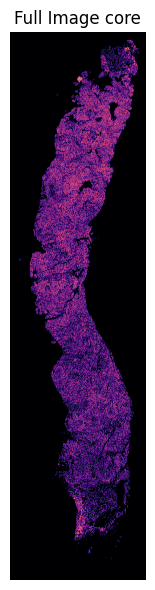

In [6]:
save_img_path = os.path.join(figure_2_dir, "full_image_single_nuclei_lifetime_no_scale_bar.png")
plt_fig = plot_full_image_from_path(core_single_nuclei_lifetime_path, 'core', figure_size=(6,6), with_scale_bar=False, save_path=save_img_path)

## Plot ROC-AUC of lifetime distribution model for patch-wise after aggregation

#### Note on Data Preparation

The csv data used in this code was generated in the following notebook:

**`TNBC_FLIM/notebooks/analysis_paper_result_reproduce/Supplementary/SAUCScorePerPatchSizeLifetimeDistribution_preparation.ipynb`**

Please make sure to run that notebook first to prepare the necessary data files before executing this one.

ROC-AUC of patch_size : 1500
Median AUC: 0.6572463768115941
Figure saved as PDF at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Figure 2/AUCScorePerPatchSizeLifetimeDistribution_1500.pdf


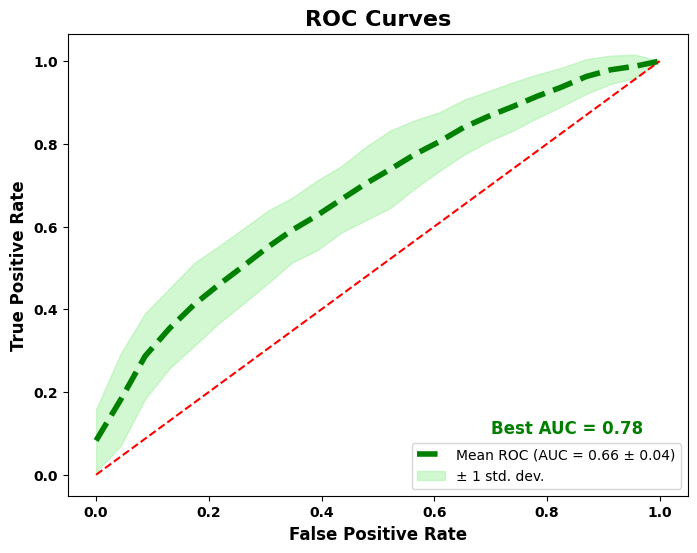

In [6]:
print(f"ROC-AUC of patch_size : {patch_size}")

# CSV filename (updated from .pkl to .csv)
model_results_name = f"patch_{patch_size}_lifetime_distribution_model_agg_results_patch_wise.csv"
distribution_model_results = os.path.join(data_preparation_dir, model_results_name)

# Read the CSV
model_results_df = pd.read_csv(distribution_model_results)

# Convert stringified lists back to Python lists
model_results_df['fpr_agg'] = model_results_df['fpr_agg'].apply(ast.literal_eval)
model_results_df['tpr_agg'] = model_results_df['tpr_agg'].apply(ast.literal_eval)

seeds, auc_list, fpr_list, tpr_list = model_results_df['seed_val'], model_results_df['auc_agg'], model_results_df['fpr_agg'], model_results_df['tpr_agg']

file_name= f"AUCScorePerPatchSizeLifetimeDistribution_{patch_size}"

plot_mean_auc_roc_lists(fpr_list, tpr_list, auc_list, std_num=1, save_file_path=figure_2_dir, save_file_name= file_name)

## Probability vs lifetime value analysis

#### Note on Data Preparation

The data used in this code was generated in the following notebook:

**`TNBC_FLIM/flim_analysis/spatial_analysis/spatial_information.ipynb`**

Please make sure to run that notebook first to prepare the necessary data files before executing this one.

In [7]:
radii = [40, 80, 120]
radius_colors = {40: 'orange', 80: 'blue', 120: 'gray'}

In [8]:
file_path = os.path.join(data_preparation_dir, f'mean_prob_patch_size_{patch_size}_for_each_nucleus.csv')

best_hist_aggregated_df_1500 = pd.read_csv(file_path, dtype={'leap_ID': str})

In [9]:
best_hist_aggregated_df_1500.head(2)

,nucleus_label,leap_ID,lifetime_mean,X coordinate,Y coordinate,category,prob_results
0,1,015,4.114694,3662.775510,1900.285714,non responder,0.510318
1,1,017,4.067597,2863.145161,3150.403226,non responder,0.636030


In [10]:
leap_id = '073'
transition_type = 'homogeneous_heterogeneous'
# file_name = f'leap{leap_id}_from_r_to_nr_homo_hetro.csv'
file_name = 'all_probability_coords.csv'
prob_coords_leap_file_path = os.path.join(data_preparation_dir, file_name)
prob_coords_df = pd.read_csv(prob_coords_leap_file_path, dtype={'leap_ID':str})
prob_coords_df = prob_coords_df[(prob_coords_df['leap_ID'] == leap_id) & (prob_coords_df['transition_type'] == transition_type)]


leap - 073


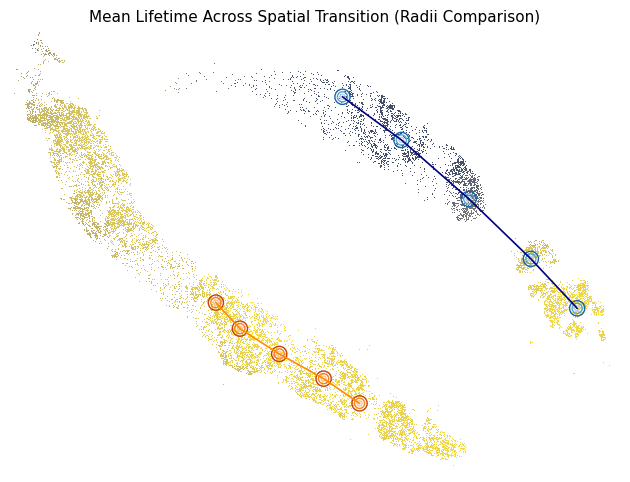

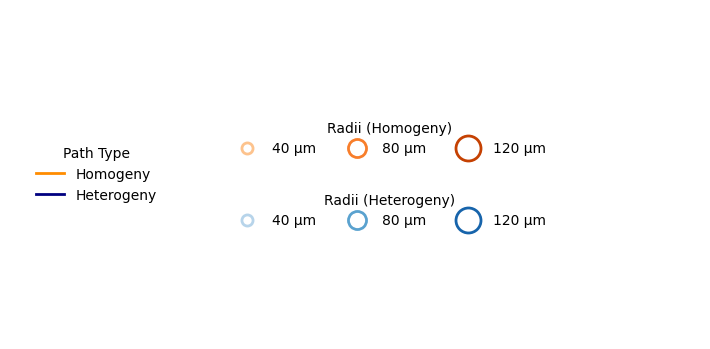

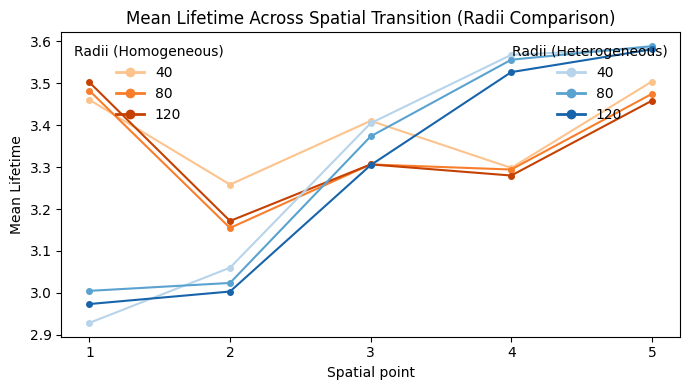

In [12]:
plot_transition_2_path_homo_hetro_region(leap_id=leap_id, prob_coords=prob_coords_df, lifetime_and_prob_df=best_hist_aggregated_df_1500, radius_list=radii, figure_save_dir=figure_2_dir ,save_plot=False)